In [1]:
#-*- coding:utf8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(color_codes=True)

In [2]:
titanic_data = 'titanic-data.csv'
titanic_df = pd.read_csv(titanic_data)

In [3]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Data Dictionary
|Variable|Definition|	Key|
|:--|:--|:--|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex||	
|Age|	Age in years||	
|sibsp|	# of siblings / spouses aboard the Titanic||
|parch|	# of parents / children aboard the Titanic||
|ticket|	Ticket number||	
|fare|	Passenger fare||
|cabin|	Cabin number||
|embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|
### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# 数据整理

In [40]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Age

从上图可以看出，Age的行数只有714行，而其余的属性均为891行，因此Age存在缺失值, 用Age的均值进行填充

In [144]:
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())

## Embarked

In [145]:
titanic_df.Embarked[titanic_df.Embarked.isnull()]

61     NaN
829    NaN
Name: Embarked, dtype: object

从上面结果中，可以看出Embarked中有两个缺失值

In [153]:
titanic_df.groupby('Embarked').count().Survived

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

可以看出Embarked的众数为S，所以将缺失值填充为S

In [155]:
titanic_df.Embarked = titanic_df.Embarked.fillna('S')

# 定义公共函数

In [4]:
def draw_bar_figure(data, labels=None):
    data.plot.bar()
    if labels is None:
        plt.xticks(fontsize=15)
    else:
        plt.xticks(np.arange(len(labels)), labels, fontsize=15)
    plt.yticks(fontsize=15)
    
def draw_pie_figure(data, labels=None):
    _, texts, autotext = plt.pie(data,
    labels=labels,
    autopct='%.3f%%')
    
    for t in texts:
        t.set_size(15)
    for t in autotext:
        t.set_size(15) 
        
def draw_bar_pie_figure(serise, lables=None):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    draw_bar_figure(serise, lables)

    plt.subplot(122)
    draw_pie_figure(serise, lables)

# 1 泰坦尼克号总体情况

## 1.1 男女人数及比例

In [5]:
male_count = titanic_df.Sex.value_counts()['male']
female_count = titanic_df.Sex.value_counts()['female']
sex_rate = round(float(male_count) / female_count,3)

print "船上男性人数为{}人, 女性人数为{}人, 男女比例为{}".format(male_count, female_count, sex_rate)

船上男性人数为577人, 女性人数为314人, 男女比例为1.838


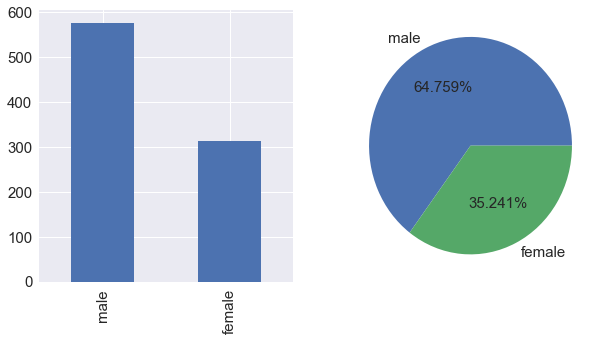

In [6]:
draw_bar_pie_figure(titanic_df.Sex.value_counts(), ('male', 'female'))

## 1.2 客舱人数及比例

In [7]:
pclass_counts = titanic_df.Pclass.value_counts()
print "船上高级客舱人数为{}人, 中级客舱人数为{}人, 低级客舱人数为{}".format(pclass_counts[1], pclass_counts[2], pclass_counts[3])

船上高级客舱人数为216人, 中级客舱人数为184人, 低级客舱人数为491


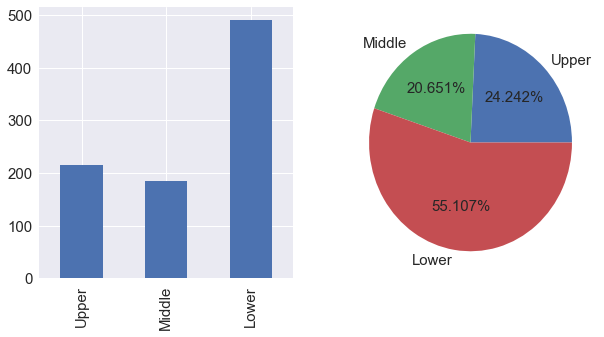

In [8]:
draw_bar_pie_figure(titanic_df.Pclass.value_counts().sort_index(), ('Upper', 'Middle', 'Lower'))

## 1.3 乘客年龄分布

### 1.3.1 年龄大致分布情况

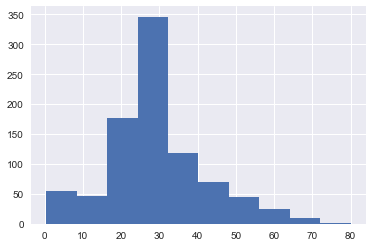

In [52]:
titanic_df.Age.hist(bins = 10)

根据上图可以看出，乘客年龄大致集中在18-45岁之间

### 1.3.2 根据年龄断划分人群

In [136]:
def get_age_grades(df):
    if df >= 60:
        return 'old-age'
    elif df >= 40:
        return 'middle-age'
    elif df >= 30:
        return 'thirties'
    elif df >= 24:
        return 'youth'
    elif df >= 18:
        return 'adult'
    elif df >= 13:
        return 'teenager'
    elif df >= 6:
        return 'middle-childhood'
    elif df >= 3:
        return 'early-childhood'
    elif df >= 1:
        return 'toddlerhood'
    elif df >= 0:
        return 'infancy'
    else:
        return 'unknown'

age_grades_counts = titanic_df.Age.apply(get_age_grades).value_counts()
age_grades_counts

youth               314
thirties            167
middle-age          137
adult               134
teenager             44
old-age              26
middle-childhood     25
early-childhood      20
toddlerhood          17
infancy               7
Name: Age, dtype: int64

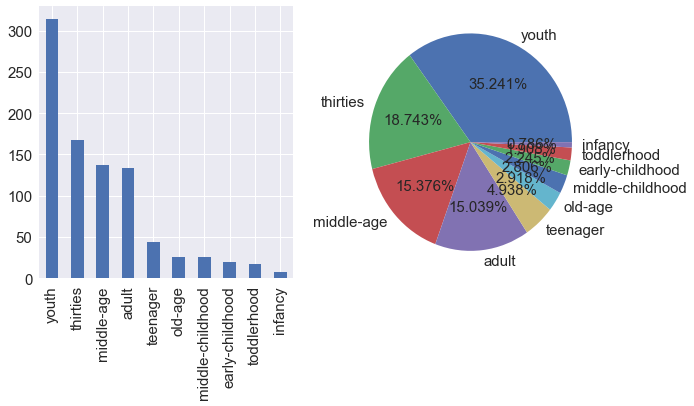

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(121)
draw_bar_figure(age_grades_counts)

plt.subplot(122)    
draw_pie_figure(age_grades_counts.get_values(), age_grades_counts.index)

可以发现，乘客主要集中在18-60岁

## 1.4 港口上船人数及比例

In [59]:
embarked_counts = titanic_df.Embarked.value_counts()
print '瑟堡上船人数为{}人， 昆士城上船人数为{}人，南安普敦上船人数为{}人'.format(
    embarked_counts['C'], 
    embarked_counts['Q'], 
    embarked_counts['S'])

瑟堡上船人数为168人， 昆士城上船人数为77人，南安普敦上船人数为644人


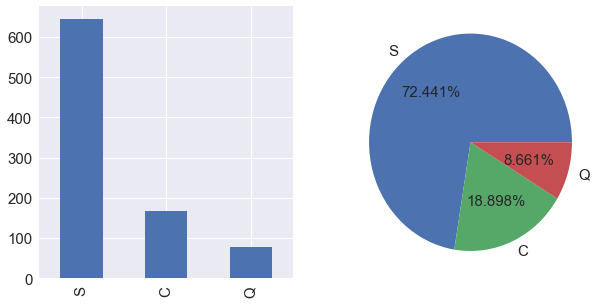

In [60]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
draw_bar_figure(embarked_counts)

plt.subplot(122)
draw_pie_figure(embarked_counts.get_values(), embarked_counts.index)

## 1.5 上船港与舱位关系

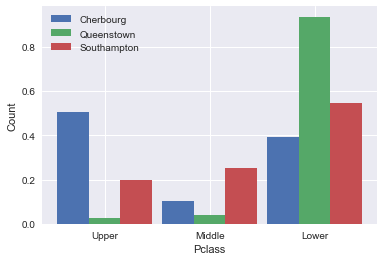

In [164]:
embarked_pclass_group = titanic_df.groupby(['Embarked','Pclass'])
embarked_pclass_rate = embarked_pclass_group.count().Survived / titanic_df.groupby('Embarked').Survived.count()

x = np.arange(1, 4)
width = 0.3
plt.bar(x-width, embarked_pclass_rate.C, width)
plt.bar(x, embarked_pclass_rate.Q, width)
plt.bar(x+width, embarked_pclass_rate.S, width)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks((1, 2, 3), ('Upper', 'Middle', 'Lower'))
plt.legend(['Cherbourg', 'Queenstown', 'Southampton'])

**结论**:由昆士城上船的人大多买的Lower仓（平民多），由瑟堡上船的人基本集中在Upper和Middle仓(有钱人多)

# 2 泰坦尼克生还率情况

## 2.1 总体生还率

In [15]:
survived_rate = round(titanic_df.Survived.sum() / float(titanic_df.Survived.count()),3)
print '泰坦尼克号总人数为{}人，生还人数为{}人，生还率为{}'.format(titanic_df.Survived.count(),
                                            titanic_df.Survived.sum(),
                                            survived_rate)

泰坦尼克号总人数为891人，生还人数为342人，生还率为0.384


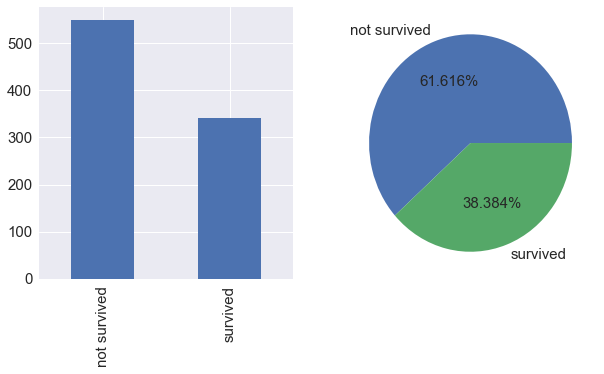

In [16]:
draw_bar_pie_figure(titanic_df.Survived.value_counts(), ('not survived', 'survived'))

## 2.2 性别与生还率

In [17]:
male_df = titanic_df[titanic_df.Sex == 'male']
female_df = titanic_df[titanic_df.Sex == 'female']

### 2.2.1 男性生还率

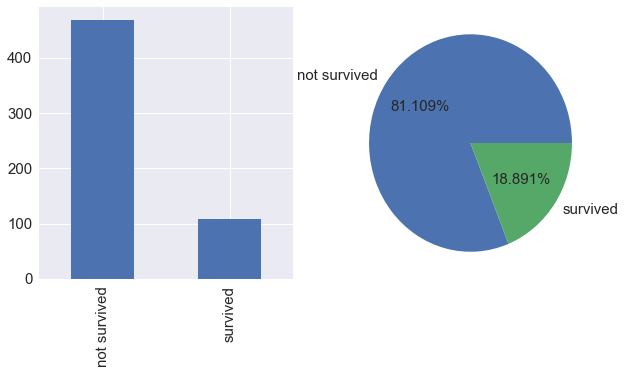

In [18]:
draw_bar_pie_figure(male_df.Survived.value_counts().sort_index(), ('not survived', 'survived'))

### 2.2.2 女性生还率

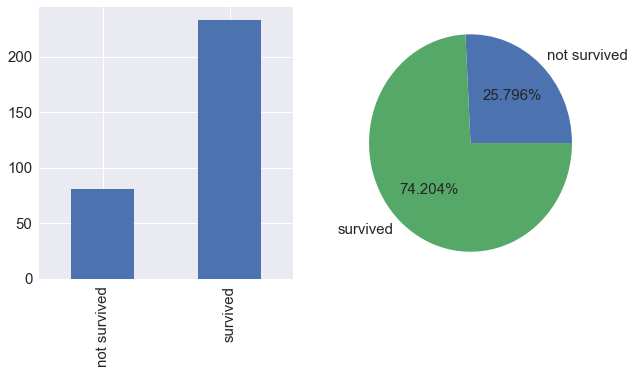

In [19]:
draw_bar_pie_figure(female_df.Survived.value_counts().sort_index(), ('not survived', 'survived'))

**结论**：男性的生还率(18.891%)远低于女性生还率(74.204%)

## 2.3 舱位与生还率

In [20]:
class1_df = titanic_df[titanic_df.Pclass == 1]
class2_df = titanic_df[titanic_df.Pclass == 2]
class3_df = titanic_df[titanic_df.Pclass == 3]

### 2.3.1 Upper舱位生还率

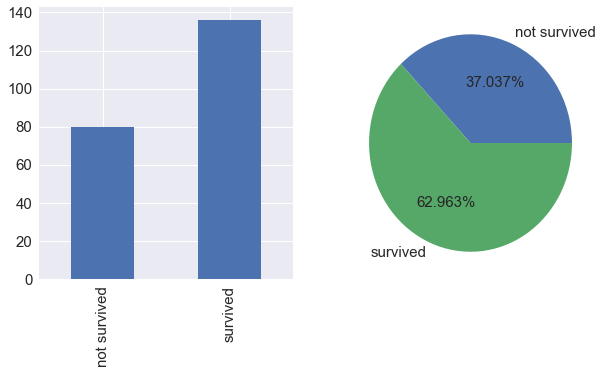

In [70]:
draw_bar_pie_figure(class1_df.Survived.value_counts().sort_index(), ('not survived', 'survived'))

### 2.3.2 Middle舱位生还率

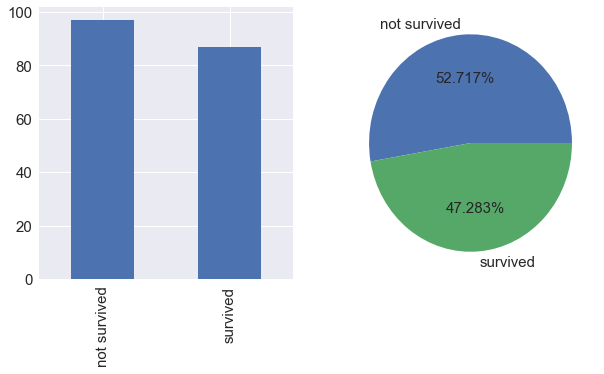

In [71]:
draw_bar_pie_figure(class2_df.Survived.value_counts().sort_index(), ('not survived', 'survived'))

### 2.3.3 Lower舱位生还率

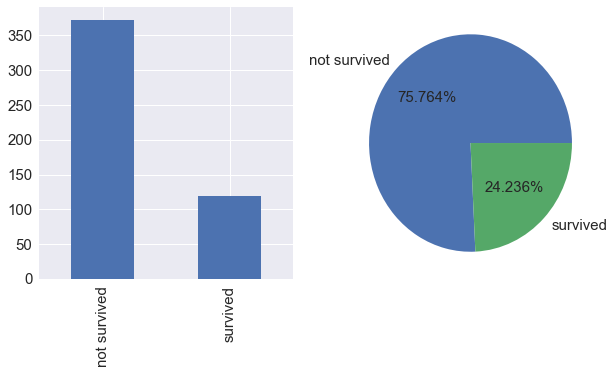

In [23]:
draw_bar_pie_figure(class3_df.Survived.value_counts().sort_index(), ('not survived', 'survived'))

**结论**：Upper舱位生还率(62.963%)最高，Middle舱位生还率(47.283%)次之，Lower舱位虽然人数最多，但获救率(24.236%)最低

### 2.3.4 舱位与性别与生还率

Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64

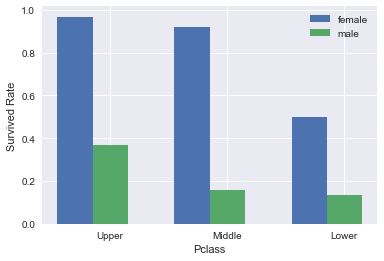

In [114]:
pclass_sex_group = titanic_df.groupby(['Sex', 'Pclass'])
survived_rate = (pclass_sex_group.sum()/pclass_sex_group.count()).Survived

x = np.arange(1, 4)
width = 0.3
plt.bar(x-width, survived_rate.female, width)
plt.bar(x, survived_rate.male, width)
plt.xlabel('Pclass')
plt.ylabel('Survived Rate')
plt.xticks((1, 2, 3), ('Upper', 'Middle', 'Lower'))
plt.legend(['female', 'male'])

**结论**：舱位等级越高生还率越高，同舱位女性生还率高于男性

# 2.4 上船港口与生还率

In [25]:
embarked_c_df = titanic_df[titanic_df.Embarked == 'C']
embarked_q_df = titanic_df[titanic_df.Embarked == 'Q']
embarked_s_df = titanic_df[titanic_df.Embarked == 'S']

### 2.4.1 瑟堡生还率

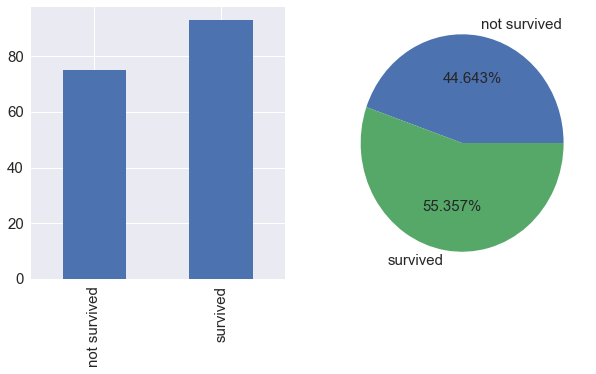

In [26]:
draw_bar_pie_figure(embarked_c_df.Survived.value_counts().sort_index(), ('not survived', 'survived'))

### 2.4.2 昆士城生还率

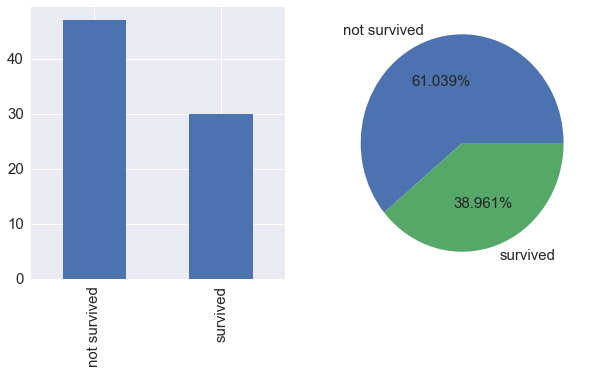

In [27]:
draw_bar_pie_figure(embarked_q_df.Survived.value_counts().sort_index(), ('not survived', 'survived'))

### 2.4.3 南安普敦

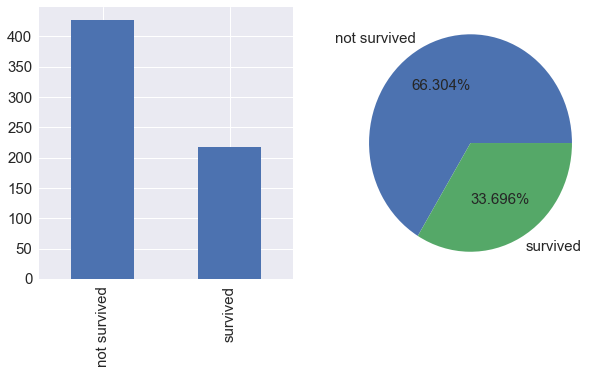

In [28]:
draw_bar_pie_figure(embarked_s_df.Survived.value_counts().sort_index(), ('not survived', 'survived'))

**结论**：瑟堡生还率(55.357%)最高，昆士城(38.961%)次之，南安普敦(33.696%)最低

## 2.5 年龄与生还率

In [29]:
titanic_df['age_grades'] = titanic_df.Age.apply(get_age_grades)

### 2.5.1 按照年龄阶段查看

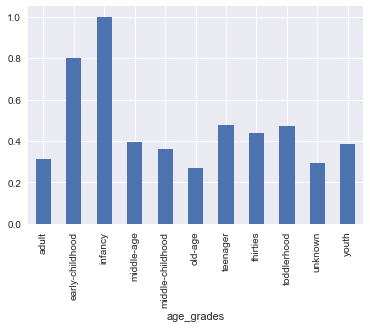

In [30]:
(titanic_df.groupby('age_grades').sum() / titanic_df.groupby('age_grades').count()).Survived.plot.bar()

### 2.5.2 按照年龄查看

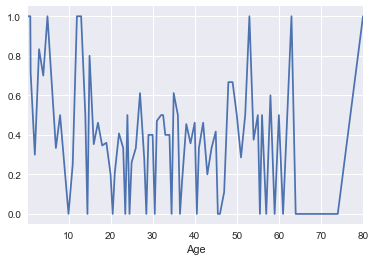

In [31]:
age_group = titanic_df.groupby('Age')
age_survived_rate = (age_group.sum()/age_group.count()).Survived

age_survived_rate.plot()

**结论**：可以看出年幼的和年长的生还率较高，年轻的存活率较低